In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from operator import itemgetter


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Filippo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_json("clustered.json")


In [ ]:
#vader thresholds in literature
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
text = data["text"].tolist()
scores = list()
positive = list()
negative = list()
neut = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
    positive.append(vader.polarity_scores(t)['pos'])
    negative.append(vader.polarity_scores(t)['neg'])
    neut.append(vader.polarity_scores(t)['neu'])
print(scores[0])
print(positive[0])
print(negative[0])
print(neut[0])


E:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


0.7519
0.184
0.0
0.816


(array([210., 296., 365., 211.,  94., 777., 382., 725., 631., 518.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

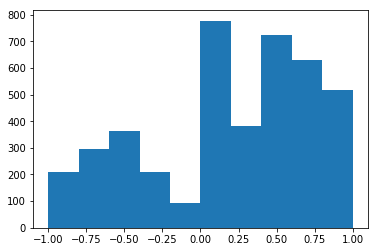

In [4]:
plt.hist(scores,bins=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

(array([2.523e+03, 1.206e+03, 4.510e+02, 2.800e+01, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

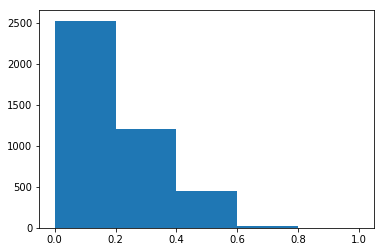

In [5]:
plt.hist(positive,bins=[0,0.2,0.4,0.6,0.8,1])

(array([3.507e+03, 6.310e+02, 6.900e+01, 2.000e+00, 0.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

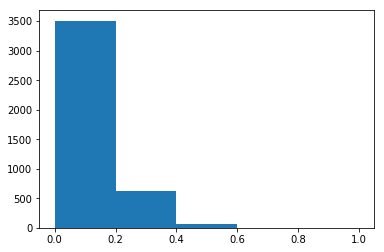

In [6]:
plt.hist(negative,bins=[0,0.2,0.4,0.6,0.8,1])


(array([1.000e+00, 3.600e+01, 7.530e+02, 1.835e+03, 1.584e+03]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

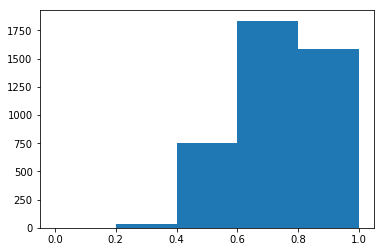

In [7]:
plt.hist(neut,bins=[0,0.2,0.4,0.6,0.8,1])

In [8]:
data["vaderScore"] = scores
#data["vaderPos"] = positive
#data["vaderNeg"] = negative
#data["vaderNeut"] = neut



In [9]:
data.drop(["in_reply_to_user_id_str","is_retweet","text","modded_text","modded1","year","date"],axis=1,inplace=True)
data

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels,vaderPos,vaderNeg,vaderNeut
25967,6735,2108,1,0,53,i will be on foxnews live with members of my f...,foxnew live member famili 1150 pm ring ...,3,0.184,0.000,0.816
25968,8581,3460,1,3,53,happy new year amp thank you,happi new year amp thank,0,0.570,0.000,0.430
25970,8258,1948,1,6,53,happy new year from thank you to my great fa...,happi new year thank great famili support,0,0.506,0.000,0.494
25971,7490,2721,1,6,53,jallenaip hillary said she was in a fog of war...,jallenaip hillari said fog war explan l...,2,0.000,0.304,0.696
25972,3330,933,1,21,53,sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2,0.271,0.000,0.729
25973,8495,2642,1,23,53,well the year has officially begun i have many...,well year offici begun mani stop plan ...,3,0.203,0.104,0.693
25974,2780,654,1,23,53,marie7777777777 realdonaldtrump we love u to t...,marie7777777777 realdonaldtrump love u tr...,0,0.565,0.000,0.435
25975,3066,893,1,23,53,jodil792 we are standing with you spreading th...,jodil792 stand spread wordtrump presid 2...,0,0.155,0.000,0.845
25976,3492,881,1,23,53,memeoryhead im one of your biggest fans mr tru...,memeoryhead im one biggest fan mr trump...,0,0.224,0.000,0.776
25977,3346,922,1,23,53,casuperrunner huckabee is a good manbut he n...,casuperrunn huckabe good manbut need get...,2,0.341,0.000,0.659


In [10]:
data.corr()

,favorite_count,retweet_count,month,hour,week_year,labels,vaderPos,vaderNeg,vaderNeut
favorite_count,1.000000,0.908397,0.464811,0.003317,0.443658,0.060065,0.010754,0.082151,-0.070376
retweet_count,0.908397,1.000000,0.421107,0.015665,0.400986,0.027518,-0.033499,0.087821,-0.029056
month,0.464811,0.421107,1.000000,-0.049998,0.936428,-0.005117,-0.050934,-0.004144,0.055338
hour,0.003317,0.015665,-0.049998,1.000000,-0.043332,-0.003687,-0.048920,0.034519,0.025283
week_year,0.443658,0.400986,0.936428,-0.043332,1.000000,-0.009679,-0.051761,-0.003423,0.055669
labels,0.060065,0.027518,-0.005117,-0.003687,-0.009679,1.000000,-0.171918,0.115015,0.093372
vaderPos,0.010754,-0.033499,-0.050934,-0.048920,-0.051761,-0.171918,1.000000,-0.388408,-0.745932
vaderNeg,0.082151,0.087821,-0.004144,0.034519,-0.003423,0.115015,-0.388408,1.000000,-0.324003
vaderNeut,-0.070376,-0.029056,0.055338,0.025283,0.055669,0.093372,-0.745932,-0.324003,1.000000


In [35]:
x1 = data[data["labels"] == 2]
print(len(x1))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(),
                      columns=feat_names)
    return(df)


corpus = x1["modded1_stemmed"].tolist()
#DOVRESTI PROVARE A RIMUOVERE LE PAROLE PIU O MENO FREQUENTI PER IL TFIDF?

# instantiate the vectorizer object
cvec = TfidfVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpus)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
c = wm2df(wm, tokens)

1242


TypeError: '<' not supported between instances of 'str' and 'int'

In [29]:
x1.reset_index(inplace=True,drop=True)
res = pd.concat([x1,c], axis=1)
res1 = res.drop(["noTags_punct","modded1_stemmed","labels","favorite_count","retweet_count"],axis=1)
res

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels,vaderPos,vaderNeg,...,yesterday,yet,york,yorker,youd,young,your,yt,zero,zuckerman
0,7490,2721,1,6,53,jallenaip hillary said she was in a fog of war...,jallenaip hillari said fog war explan l...,2,0.000,0.304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,3330,933,1,21,53,sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2,0.271,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.317018,0.0,0.0,0.0
2,3346,922,1,23,53,casuperrunner huckabee is a good manbut he n...,casuperrunn huckabe good manbut need get...,2,0.341,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,6363,2145,1,4,53,massive crowds expected in mississippi tomorro...,massiv crowd expect mississippi tomorrow ...,2,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,14673,7832,1,13,53,hillary clinton said that it is ok to ban musl...,hillari clinton said ok ban muslim isra...,2,0.067,0.085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,6568,2238,1,20,53,hillary clinton doesnt have the strength or st...,hillari clinton doesnt strength stamina ...,2,0.113,0.242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,8017,3609,1,20,53,i hope bill clinton starts talking about women...,hope bill clinton start talk women issu...,2,0.105,0.131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,15803,6065,1,21,53,remember i am selffunding my campaign the only...,rememb selffund campaign one either part...,2,0.231,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,6955,1763,1,0,53,just arrived in mississippi for the rally word...,arriv mississippi ralli word crowd overf...,2,0.170,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,3224,894,1,5,53,namusca realdonaldtrump erictrump diamondandsi...,namusca realdonaldtrump erictrump diamonda...,2,0.158,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# KMEANS

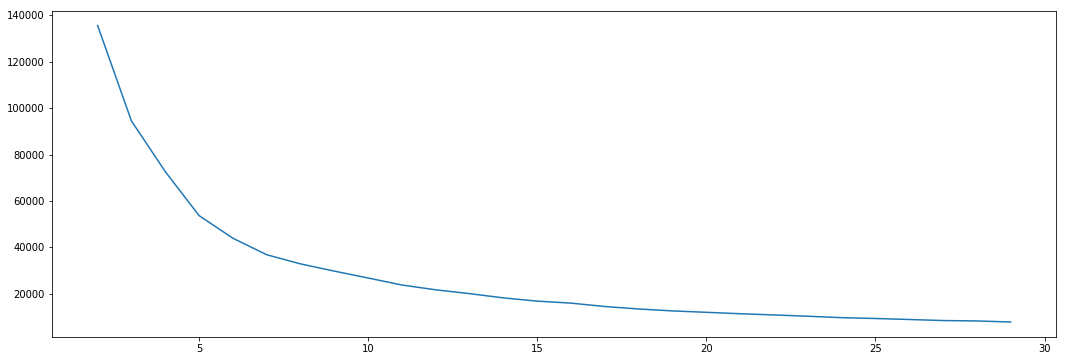

Wall time: 2min 8s


In [30]:
%%time
sse_list = list()
max_k = 30
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(res1)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [36]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(res1)
print(model.inertia_)
print
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster 0: ")
labels = model.labels_
res1["labels"] = labels
d = silhouette_score(res1, labels,metric='euclidean')
print(d)

33074.6710670546
Top terms per cluster 0: 


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0.4551669896836694


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    #plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    #plt.title("cluster " + str(c))
    #plt.show()
    


In [39]:
#per descrivere i cluster prendi i valori con tfidf più alto
g = res1.drop(['month', 'hour', 'week_year'],axis=1)

for cluster in g["labels"].unique():
    print(cluster)
    g1 = g[g["labels"] == cluster]
    meanTf = []
    for column in g1.columns:
        if column != "labels":
            m = g1[column].mean()
            meanTf.append([column,m])
    
    meanTfOrdered = sorted(meanTf, key=itemgetter(1),reverse = True)
    print(meanTfOrdered[0:10])

3
[['realdonaldtrump', 0.04667022215518237], ['rt', 0.04316020768810827], ['bigleaguetruth', 0.04301771859868922], ['debat', 0.03583857592755133], ['teamtrump', 0.03377190317370552], ['hillaryclinton', 0.030723318718703766], ['mike_p', 0.028542513271850797], ['great', 0.0264096320977571], ['debates2016', 0.024348290734460067], ['maga', 0.022203987429209964]]
1
[['clinton', 0.025429401833043836], ['vote', 0.023150239360404865], ['replac', 0.02215564670115438], ['repeal', 0.02176187016275068], ['time', 0.020971716736186717], ['hillari', 0.020952310320549488], ['state', 0.020777925806971218], ['win', 0.020583536623349385], ['obamacar', 0.019179695906121095], ['happi', 0.01905601773011104]]
0
[['cruz', 0.03768878369470708], ['trump', 0.029907058473180675], ['great', 0.028485553768094564], ['ted', 0.02374090268533501], ['realdonaldtrump', 0.022263305412335677], ['make', 0.022004753780990496], ['america', 0.02195275529227581], ['rubio', 0.020670294188939044], ['vote', 0.020556672121571706], 

# potrebbero migliorare togliendo i termini più e meno frequenti

# hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering
sil = []
for c in range(2,20):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=c)
    clustering.fit(res1)
    labels = clustering.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

In [ ]:
plt.plot([x for x in range(len(sil))],sil)

In [ ]:
clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=8)
clustering.fit(res1)
labels = clustering.labels_
res1["labels"] = labels

In [ ]:

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()
    

In [ ]:
res[res1["labels"] == 2]["noTags_punct"].tolist()

# BIRCH

In [ ]:
from sklearn.cluster import Birch

sil=[]
for c in range(2,10):
    brc = Birch(branching_factor=20, n_clusters=c, threshold=0.3,compute_labels=True)
    brc.fit(res1)
    labels = brc.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

In [ ]:
brc = Birch(branching_factor=20, n_clusters=5, threshold=0.3,compute_labels=True)
brc.fit(res1)
labels = brc.labels_
res1["labels"] = labels

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()